In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
#import some basic library
import matplotlib.pyplot as plt

In [ ]:
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
#divide the dataset into independent or dependent features
X=dataset.iloc[:,3:13]

In [ ]:
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#features engeneering
geography=pd.get_dummies(X['Geography'],drop_first=True)  #drop_first reduce it from 3 feature to 2 features
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#splitting the dataset into traning and test set
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
#Now let's create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Let's initial the ANN
classifier=Sequential()

In [ ]:
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:

#2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])   #by defualt adam LR = 0.01  # optimizers='adam'

In [ ]:
#Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4144 - accuracy: 0.8518 - val_loss: 0.3786 - val_accuracy: 0.8508
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3686 - accuracy: 0.8582 - val_loss: 0.3651 - val_accuracy: 0.8519
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3626 - accuracy: 0.8548 - val_loss: 0.3777 - val_accuracy: 0.8550
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3602 - accuracy: 0.8554 - val_loss: 0.3637 - val_accuracy: 0.8561
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3620 - accuracy: 0.8597 - val_loss: 0.3645 - val_accuracy: 0.8535
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3584 - accuracy: 0.8597 - val_loss: 0.3711 - val_accuracy: 0.8425
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3550 - accuracy: 0.8586 - val_loss: 0.3651 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

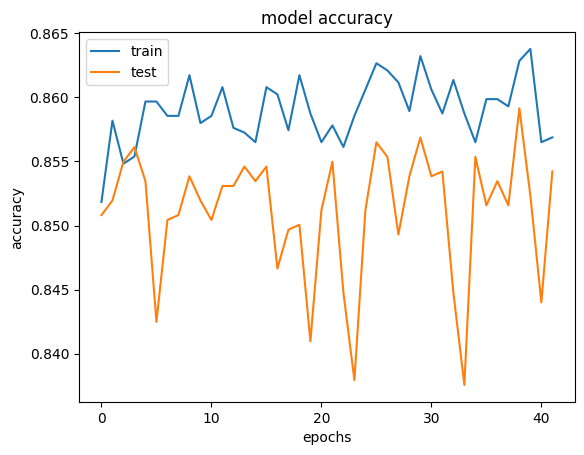

In [ ]:
#sumurize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

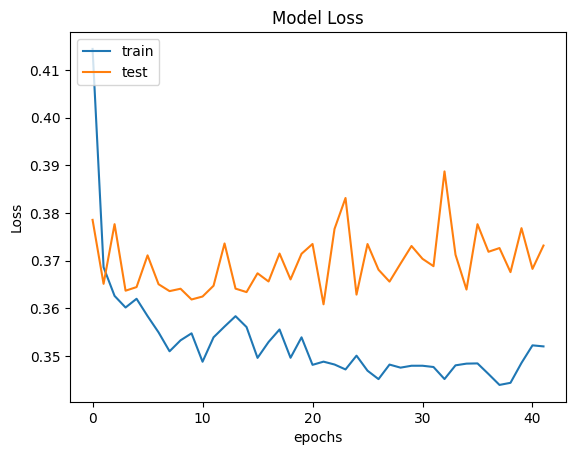

In [ ]:
#sumurize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#making prediction and evaluting the model
#predict the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
#make the confusion matrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1486,  109],
       [ 184,  221]])

In [ ]:
#calculate the accuraccy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.8535

In [ ]:
#get the wieghts
classifier.get_weights()

[array([[-0.31553608,  0.04857771, -0.5096187 ,  0.21984021,  0.85353965,
         -0.5813228 ,  1.244624  , -0.04013865,  0.6160411 , -0.7691456 ,
          0.3387393 ],
        [ 0.0651322 , -1.1689425 ,  1.046627  ,  3.1387467 , -0.28532657,
         -2.2043927 , -1.9275998 ,  0.85537374, -1.0472918 ,  2.3370924 ,
          1.4290719 ],
        [-0.1388586 ,  0.25654897,  0.23653194, -0.79729986, -0.2363629 ,
         -0.2754742 , -0.86136454,  1.2021506 ,  0.5623474 ,  0.29266483,
          0.19158553],
        [ 0.53247607, -1.4166301 , -2.3199387 ,  0.8540863 , -0.92705905,
         -0.2587886 , -0.55776894,  0.8090709 , -1.3123634 , -1.7438208 ,
          0.3366315 ],
        [ 2.9492397 ,  0.09835047, -3.126605  ,  0.06907301,  0.978249  ,
          0.6424523 , -0.1655727 , -0.31599557, -0.15870957, -0.02640625,
         -0.29235563],
        [-0.04821529,  0.03239356, -0.24514207, -0.36355752,  0.813575  ,
         -0.43459383,  1.4449675 , -0.92596704, -0.31828162, -0.2484309